# importing libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv("healthcare-dataset-stroke-data[1].csv")

In [7]:
df.head(100)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2458,Female,78.0,0,0,Yes,Private,Rural,235.63,32.3,never smoked,1
96,35512,Female,70.0,0,0,Yes,Self-employed,Rural,76.34,24.4,formerly smoked,1
97,56841,Male,58.0,0,1,Yes,Private,Rural,240.59,31.4,smokes,1
98,8154,Male,57.0,1,0,Yes,Govt_job,Urban,78.92,27.7,formerly smoked,1


Total of 5110 observations and 12 attributes

Nuemeric continuous variables = id, age, avg_glucose_level, bmi
Categorical variables =gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status

In [8]:
df.shape

(5110, 12)

In [9]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
#so there are 201 null values in bmi columns and we need to fix it

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.*

A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes There can be various factors related to occurence to stroke. So using the data given we try to list out the potential factors by using various visualization techniques.

In [12]:
df.bmi=df.bmi.fillna(np.mean(df['bmi']))

In [13]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
df.info() #to know the datatypes of variables are in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [15]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


So from above statistical description of the dataset we can see that mean age of people is around 43 years and mean bmi is more than normal

In [16]:
#droping id column
df.drop(columns='id', inplace=True)

In [17]:
df.apply(lambda x: len(x.unique()))

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [18]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [19]:
#removing other gender row
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

# data visualization

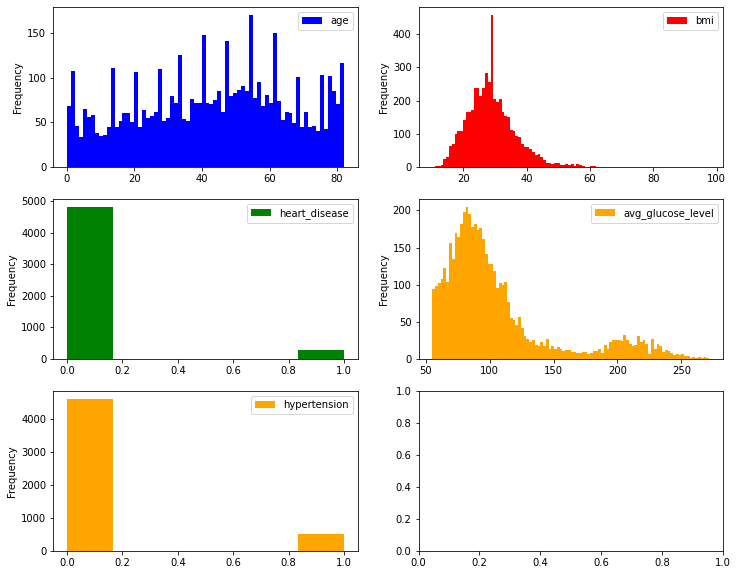

In [20]:
#histogram of continue data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
df.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
df.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
df.plot(kind="hist", y="hypertension", bins=6, color="orange", ax=axes[2][0])

plt.show()

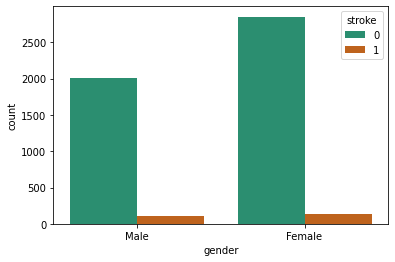

In [21]:
#countplot of categorical data
sns.countplot(x='gender',data=df,hue='stroke', palette='Dark2')


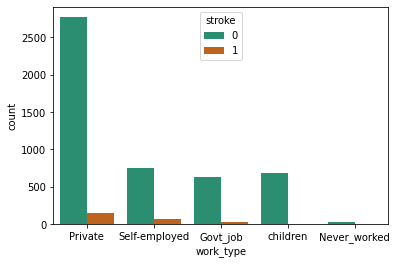

In [22]:
sns.countplot(x='work_type',data=df,hue='stroke', palette='Dark2')

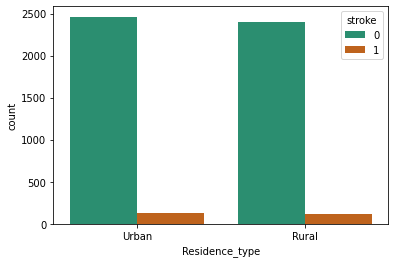

In [23]:
sns.countplot(x='Residence_type',data=df,hue='stroke', palette='Dark2')

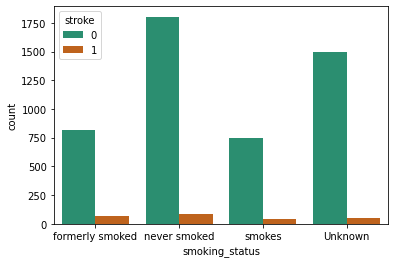

In [24]:
sns.countplot(x='smoking_status',data=df,hue='stroke', palette='Dark2')

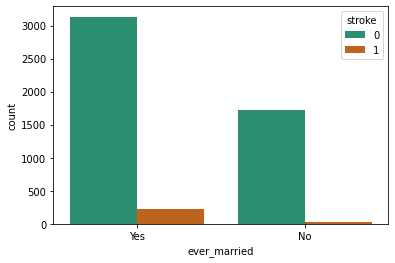

In [25]:
sns.countplot(x='ever_married',data=df,hue='stroke', palette='Dark2')

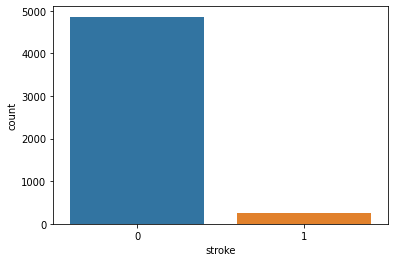

In [26]:
sns.countplot(df["stroke"])

here we can see the countplot of smoking status and work type and data is highly imbalanced here so we will do mapping of categorical variables

<Figure size 720x720 with 0 Axes>

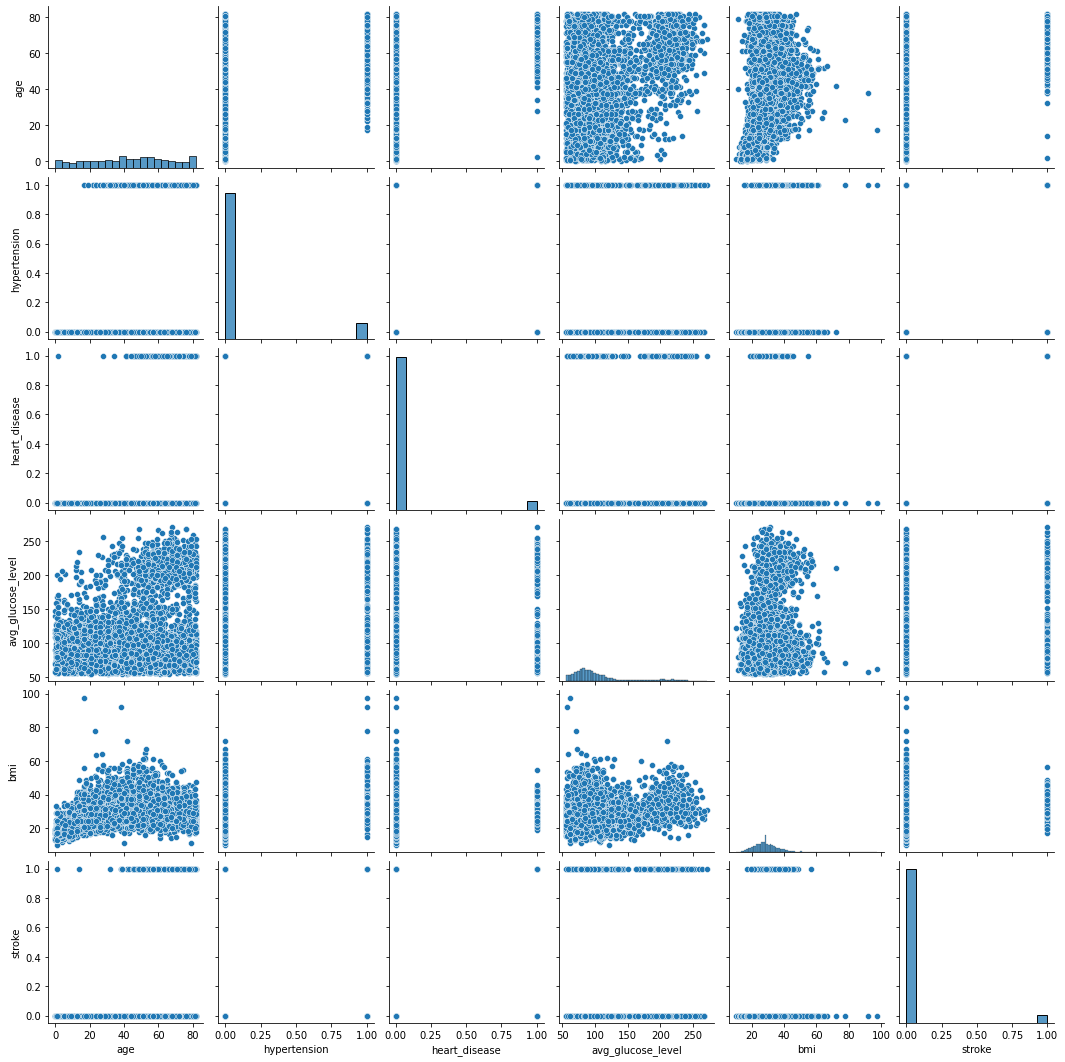

In [27]:
#pairplot
fig = plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()


# correlation between variables

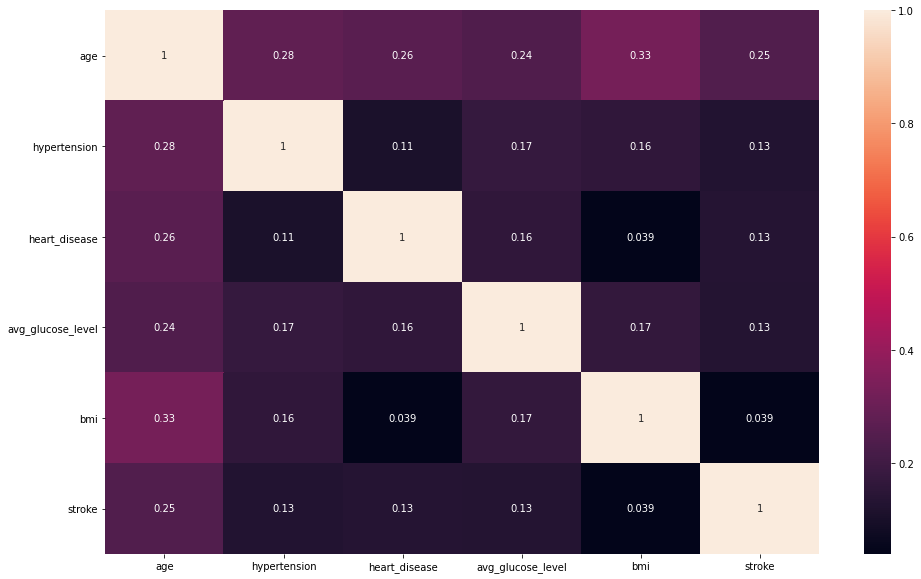

In [28]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(method='pearson'), annot=True)

so there are no highly correlated variables in this dataset

# distribution plot

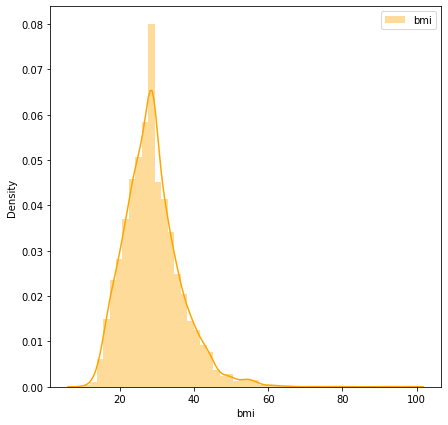

In [29]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.bmi,color='orange',label='bmi',kde=True)
plt.legend()

(10.0, 100.0)

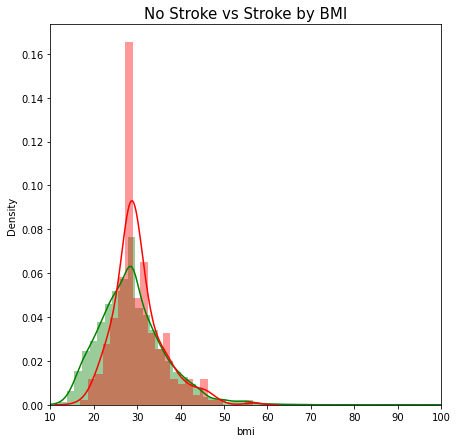

In [30]:
plt.figure(figsize=(7,7))
sns.distplot(df[df['stroke'] == 0]['bmi'],color='green')
sns.distplot(df[df['stroke'] == 1]['bmi'],color='red')

plt.title('No Stroke vs Stroke by BMI',fontsize=15)
plt.xlim([10,100])


(18.0, 100.0)

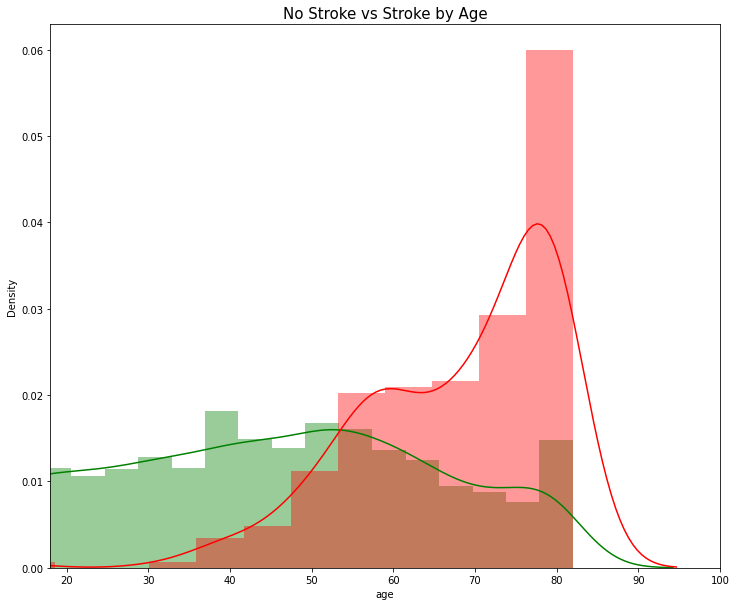

In [31]:
#stroke chances with respect to age 
plt.figure(figsize=(12,10))
sns.distplot(df[df['stroke'] == 0]['age'],color='green')
sns.distplot(df[df['stroke'] == 1]['age'],color='red')
plt.title('No Stroke vs Stroke by Age',fontsize=15)
plt.xlim([18,100])

(10.0, 100.0)

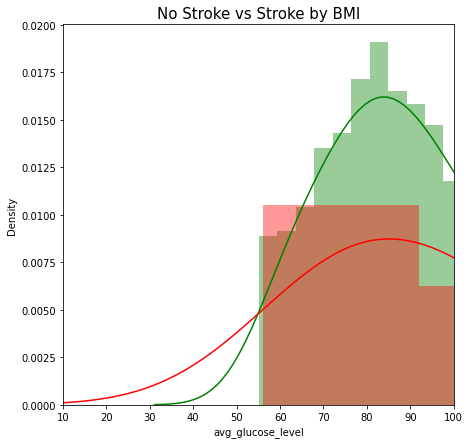

In [32]:
plt.figure(figsize=(7,7))
sns.distplot(df[df['stroke'] == 0]['avg_glucose_level'],color='green')
sns.distplot(df[df['stroke'] == 1]['avg_glucose_level'],color='red')

plt.title('No Stroke vs Stroke by BMI',fontsize=15)
plt.xlim([10,100])

<Figure size 864x360 with 0 Axes>

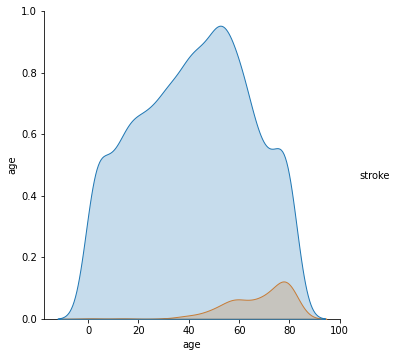

In [33]:
#does age have anything to do with stroke cases?
plt.figure(figsize=(12,5))
sns.pairplot(df[["age", "stroke"]], hue="stroke", size=5)

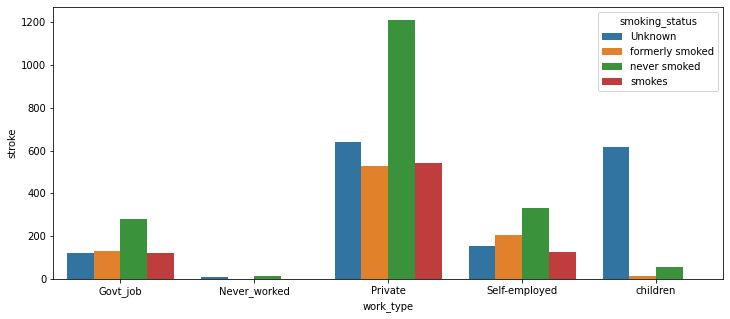

In [34]:
gp2 = df.groupby(['work_type','smoking_status'], as_index=False)['stroke'].count()
plt.figure(figsize=(12,5))
sns.barplot(x='work_type', data=gp2, y='stroke', hue='smoking_status')

# scatter plot

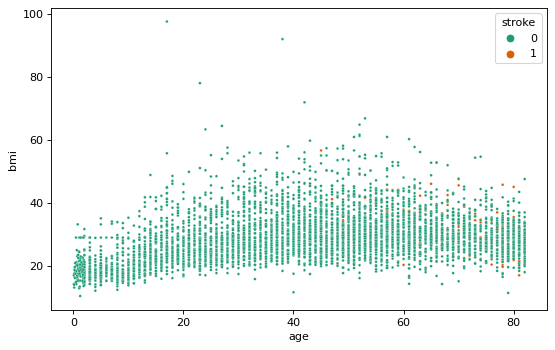

In [35]:
# bmi and age 
plt.figure(figsize=(8, 5), dpi=80)
sns.scatterplot(x='age',y='bmi',data=df,hue='stroke',s=6,marker='o',palette='Dark2')

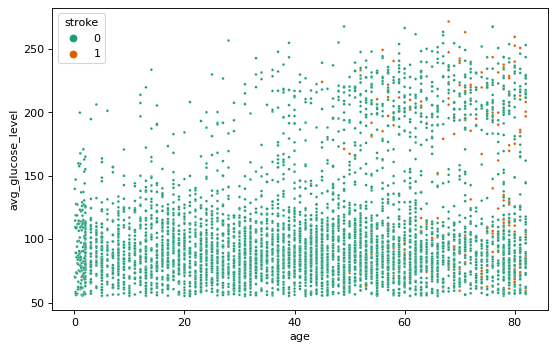

In [36]:
# -- Avg. glucose levels and BMI relations with age
plt.figure(figsize=(8, 5), dpi=80)
sns.scatterplot(x='age',y='avg_glucose_level',data=df,hue='stroke',s=6,marker='o',palette='Dark2')

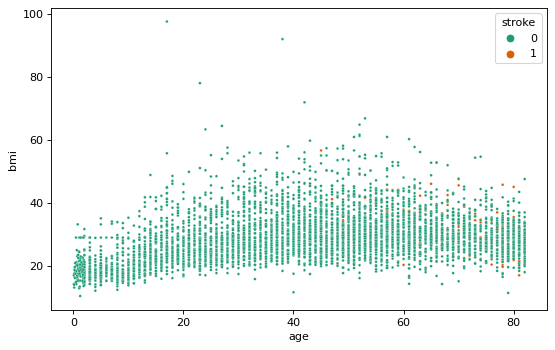

In [37]:
plt.figure(figsize=(8, 5), dpi=80)
sns.scatterplot(x='age',y='bmi',data=df,hue='stroke',s=6,marker='o',palette='Dark2')

# violin plot

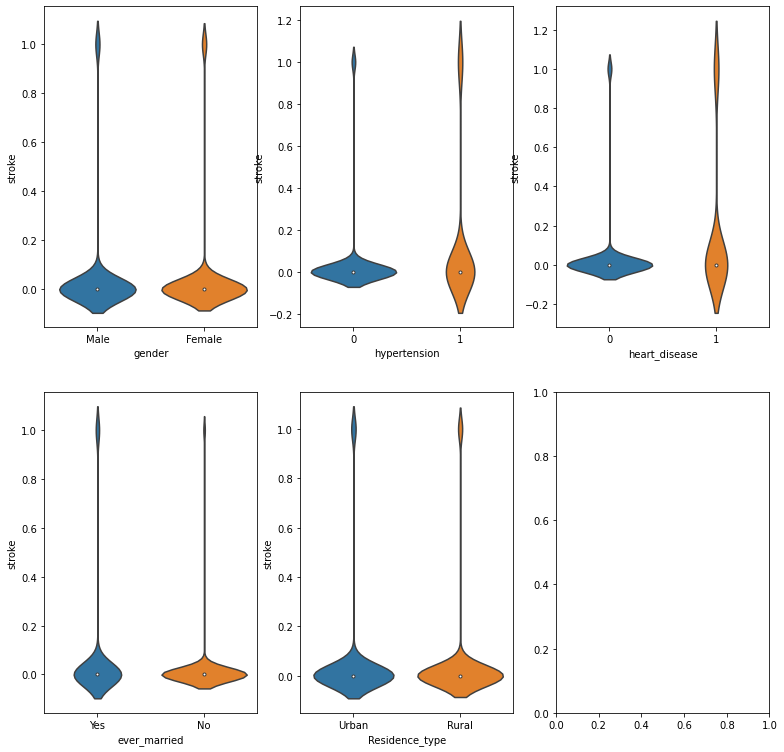

In [38]:
plt.figure(figsize=(13,13))

plt.subplot(2,3,1)
sns.violinplot(x='gender',y='stroke',data=df)
plt.subplot(2,3,2)
sns.violinplot(x='hypertension',y='stroke',data=df)
plt.subplot(2,3,3)
sns.violinplot(x='heart_disease',y='stroke',data=df)
plt.subplot(2,3,4)
sns.violinplot(x='ever_married',y='stroke',data=df)
plt.subplot(2,3,5)
sns.violinplot(x='Residence_type',y='stroke',data=df)
plt.subplot(2,3,6)

# mapping of data

In [39]:
df['gender'] = df['gender'].map({'Male':0, 'Female':1})
df['Residence_type'] = df['Residence_type'].map({'Urban':0, 'Rural':1})
df['smoking_status'] = df['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
df['ever_married'] = df['ever_married'].map({'Yes':0, 'No':1})
df['work_type']= df['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})

In [40]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.600000,0,1
1,1,61.0,0,0,0,1,1,202.21,28.893237,1,1
2,0,80.0,0,1,0,0,1,105.92,32.500000,1,1
3,1,49.0,0,0,0,0,0,171.23,34.400000,2,1
4,1,79.0,1,0,0,1,1,174.12,24.000000,1,1


so now all variables are in continuos data,so we dont have to do encoding

# Applying ML algorithms 


In [41]:
features = ['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender',
 'work_type',
 'smoking_status']

label = ['stroke']

X = df[features]
y = df[label]

In [42]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [44]:
X_train.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender,work_type,smoking_status
1547,59.0,0,1,0,1,194.98,30.4,0,1,3
4976,18.0,0,0,1,0,101.95,46.0,1,0,0
246,75.0,0,0,0,1,78.80,29.3,1,1,0
2824,41.0,0,0,0,1,97.41,25.5,1,0,1
3799,40.0,0,0,0,1,92.35,38.0,1,0,1


In [45]:
y_train.head()

,stroke
1547,0
4976,0
246,1
2824,0
3799,0


In [46]:
#rescalling data 
from sklearn.preprocessing import StandardScaler

In [47]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
model=[]
accuracy=[]

# models

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [54]:
models = []
models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')])
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVM',SVC(random_state=0)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['BernoulliNB',BernoulliNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])

In [56]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train,y = y_train, cv=5)

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

XGBClassifier :
[[967   1]
 [ 54   0]]
Accuracy Score:  0.9461839530332681

K-Fold Validation Mean Accuracy: 95.16 %

Standard Deviation: 0.06 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 %
----------------------------------------

Logistic Regression :
[[968   0]
 [ 54   0]]
Accuracy Score:  0.9471624266144814

K-Fold Validation Mean Accuracy: 95.20 %

Standard Deviation: 0.05 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 %
----------------------------------------

SVM :
[[968   0]
 [ 54   0]]
Accuracy Score:  0.9471624266144814

K-Fold Validation Mean Accuracy: 95.23 %

Standard Deviation: 0.00 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 %
----------------------------------------

KNeigbors :
[[965   3]
 [ 54   0]]
Accuracy Score:  0.9442270058708415

K-Fold Validation Mean Accuracy: 94.96 %

Standard Deviation: 0.14 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 

In [57]:
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df2


,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
2,SVM,94.716243,95.228772,0.002859,0.500000,0.000000,0.000000,0.000000
1,Logistic Regression,94.716243,95.204293,0.050195,0.500000,0.000000,0.000000,0.000000
0,XGBClassifier,94.618395,95.155363,0.060483,0.499483,0.000000,0.000000,0.000000
8,AdaBoostClassifier,94.618395,95.106433,0.172954,0.499483,0.000000,0.000000,0.000000
7,RandomForest,94.520548,95.081864,0.251568,0.498967,0.000000,0.000000,0.000000
3,KNeigbors,94.422701,94.959584,0.144206,0.498450,0.000000,0.000000,0.000000
5,BernoulliNB,93.444227,94.274689,0.338094,0.528256,0.190476,0.074074,0.106667
6,DecisionTree,90.215264,90.701834,0.960446,0.502468,0.057692,0.055556,0.056604
4,GaussianNB,87.475538,86.542602,0.390167,0.671602,0.196721,0.444444,0.272727


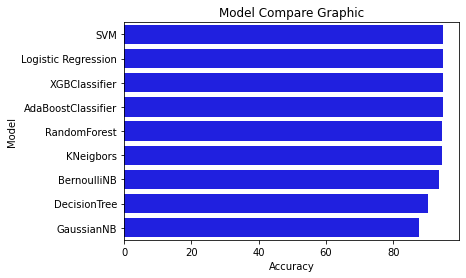

In [58]:
sns.barplot(x='Accuracy',y='Model',data=df2,color='b')
plt.title('Model Compare Graphic');


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)